# TimeSeries Stationary Test

[Video](https://www.youtube.com/watch?v=YNm0h-qZo9g&list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK&index=8)

[GitHub](https://github.com/srivatsan88/End-to-End-Time-Series)


<img src='StationarySeries.png' />

In a stationary time series the autocorrelation and mean variance do not change over time. This is centered around the mean 0, no constant change over time, no seasonality.

<img src='NonStationarySeries.png' />

**ARIMA expects stationary data** but can 

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False



In [13]:
def parse(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', parse_dates = ['Quarter'],date_parser=parse)
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


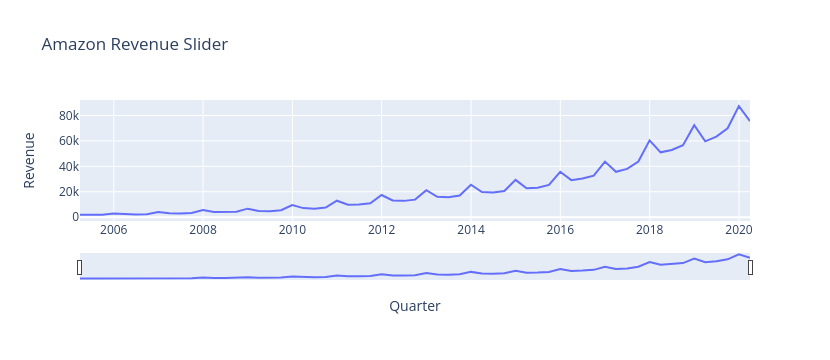

In [15]:
fig = px.line(df,
              x="Quarter",
              y='Revenue',
              title='Amazon Revenue Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [16]:
from statsmodels.tsa.stattools import kpss

In [17]:
stats, p, lags, critical_values = kpss(df['Revenue'], 'ct')

**The output here is different than when run on colab. Why?**

In [18]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical Values: {critical_values}')

if p < 0.05:
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.3066554597516956
p-value: 0.01
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


In [19]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Revenue'])

In [20]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -2.444836038197237
p-value: 0.1294794312183868
Critial Values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
Series is not Stationary
